Originally I wanted to work with https://s3.amazonaws.com/elephantscale-public/data/presidential_election_contribs/2016.zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
election_dataset_name ='C:\\Users\\masha\\Documents\\Challenge\\2016-sampled.csv.gz'
df_ele  = pd.read_csv(election_dataset_name)

In [7]:
df_ele

,CONTB_RECEIPT_AMT,CAND_NM,LASTNAME,FIRSTNAME,CONTBR_ST,LAT,LNG,CONTBR_EMPLOYER,CONTBR_OCCUPATION
0,5.00,"Clinton, Hillary Rodham",RIGNEY,FARRELL,CA,33.147294,-117.322181,SELF-EMPLOYED,CONTRACTOR
1,100.00,"Sanders, Bernard",ARNOLD,IRA,CA,38.346420,-122.694127,NONE,NOT EMPLOYED
2,24.00,"Cruz, Rafael Edward 'Ted'",VANDOREN,HELEN E. MS.,MD,39.002745,-76.931721,RETIRED,RETIRED
3,100.00,"Clinton, Hillary Rodham",RICHARDS,MARC,CA,34.070410,-118.350411,SELF-EMPLOYED,ART
4,10.00,"Clinton, Hillary Rodham",MOYER,DENNIS,CA,37.916555,-122.341233,MARIN HONDA,WARRANTY ADMINISTRATOR
5,300.00,"Clinton, Hillary Rodham",SNYDER,DAVID,OH,41.139872,-81.860559,INFORMATION REQUESTED,INFORMATION REQUESTED
6,100.00,"Huckabee, Mike",WARD,JAMES,NM,34.129177,-103.299416,REQUESTED PER BEST EFFORTS,REQUESTED PER BEST EFFORTS
7,1.50,"Sanders, Bernard",KELLY,ELAINE,MO,39.020370,-92.296535,NONE,NOT EMPLOYED
8,5.00,"Sanders, Bernard",UNDERWOOD,KELSY,MD,38.379757,-76.442883,SOUTHERN MARYLAND TOWING,DISPATCHER
9,12.00,"Trump, Donald J.",MCCAULOU,LILA,AZ,31.917849,-111.019049,INFORMATION REQUESTED,INFORMATION REQUESTED


In [131]:
df_ele_small = df_ele[['CAND_NM', 'CONTBR_ST']]
res = pd.factorize(df_ele_small['CONTBR_ST'])
res[1]
df_ele_small['CONTBR_ST']  = res[0]

C:\Users\masha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Let's see who are the candidates with the biggest amount of donations

In [132]:
df_res = df_ele_small.groupby('CAND_NM').count().sort_values('CONTBR_ST',ascending=False)
df_res.columns.values[0] = 'Donors Count'
df_res

,Donors Count
CAND_NM,
"Clinton, Hillary Rodham",4355
"Sanders, Bernard",2506
"Trump, Donald J.",935
"Cruz, Rafael Edward 'Ted'",722
"Carson, Benjamin S.",343
"Rubio, Marco",128
"Kasich, John R.",42
"Paul, Rand",42
"Bush, Jeb",41


Let's concentrate only on 3 top candidates and lot their histograms

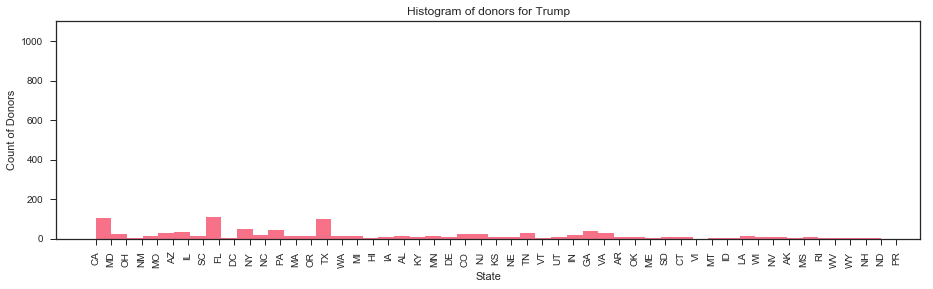

In [136]:
def plot_hist_per_cand(cand_name):
    df_ele_small[df_ele_small['CAND_NM'].str.contains(cand_name)]['CONTBR_ST'].plot.hist(bins=50)
    locs, labels = plt.xticks()

    plt.xticks(np.arange(len(res[1].tolist())),res[1].tolist())
    plt.xticks(rotation='vertical')
    plt.xlabel('State')
    plt.ylabel('Count of Donors')
    plt.title('Histogram of donors for '+ cand_name)
    plt.subplots_adjust(left = 0)
    plt.subplots_adjust(right = 2)
    plt.ylim((0,1100))

plot_hist_per_cand('Trump')

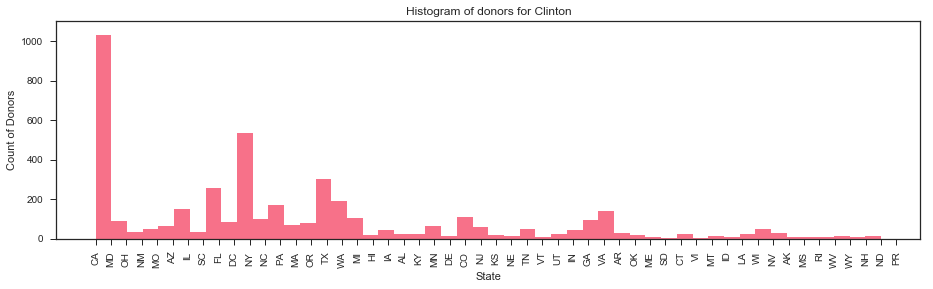

In [137]:
plot_hist_per_cand('Clinton')


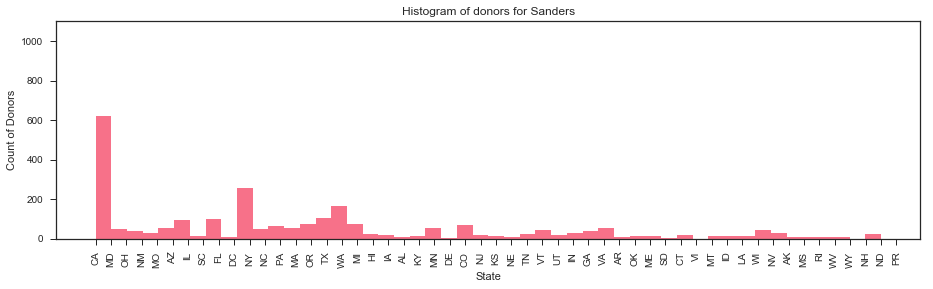

In [138]:
plot_hist_per_cand('Sanders')

Surprisingly, not only that president Trump got less support per state then two other leading candidates, he does not have any single state that was considerably more supportive of him. On other hand both Sanders and Clinton got a huge support and lost the elections. Moreover, average donation of trump was very low, as can be seen below. Future work would be to verify that on a big dataset and train random forests to predict support for a certain candidate based on location.  

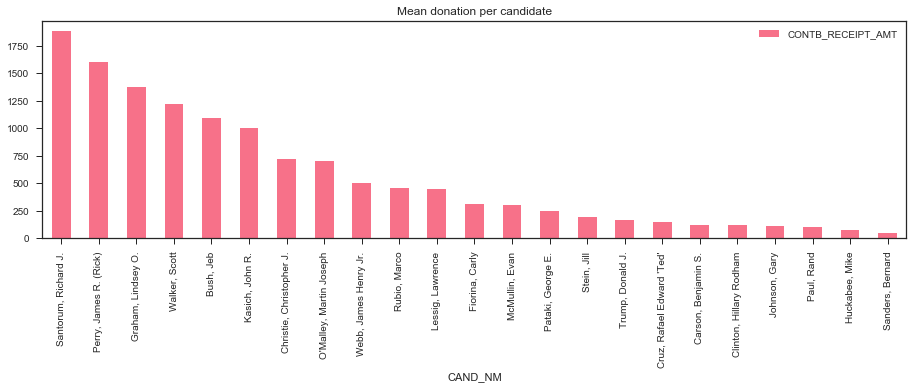

In [157]:
df_ele_mean  = df_ele_small[['CAND_NM', 'CONTB_RECEIPT_AMT']]
df_res = df_ele_mean.groupby('CAND_NM').mean().sort_values('CONTB_RECEIPT_AMT',ascending=False).plot(kind = 'bar')
plt.title('Mean donation per candidate')
plt.subplots_adjust(left = 0)
plt.subplots_adjust(right = 2)
